## IMPORT ALL LABRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder , LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

import warnings
warnings.filterwarnings('ignore')

## READ THE DATASET

In [4]:
sample = pd.read_csv('sample_submission_iA3afxn.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train[:4]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0


In [6]:
df_test[:4]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187


## EXPLORATORY DATA ANALYSIS

In [8]:
df_train.shape

(381109, 12)

In [9]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
df_train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [13]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [14]:
df_train.select_dtypes(exclude=object).corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [15]:
"""Find the Unique value depends on Features"""
for i in df_train.columns:
    print( f'\n{i} Uniquie  : {df_train[i].nunique()} \n===========================')   


id Uniquie  : 381109 

Gender Uniquie  : 2 

Age Uniquie  : 66 

Driving_License Uniquie  : 2 

Region_Code Uniquie  : 53 

Previously_Insured Uniquie  : 2 

Vehicle_Age Uniquie  : 3 

Vehicle_Damage Uniquie  : 2 

Annual_Premium Uniquie  : 48838 

Policy_Sales_Channel Uniquie  : 155 

Vintage Uniquie  : 290 

Response Uniquie  : 2 


In [16]:
df_train.loc[df_train['Vehicle_Age'] == '< 1 Year']['Response'].count()

164786

In [17]:
df_train.loc[df_train['Vehicle_Age'] == '> 2 Years']['Response'].count()

16007

In [18]:
df_train.loc[df_train['Vehicle_Age'] == '1-2 Year']['Response'].count()

200316

In [19]:
df_train.loc[df_train['Region_Code'] == 0.0]['Response'].count()

2021

In [20]:
df_train.loc[df_train['Age'] == 70]['Response'].count()

2349

In [21]:
df_train.loc[df_train['Driving_License'] == 0]['Age'].mean()

65.60467980295566

In [22]:
#df_train.loc[df_train['Gender'] == "Male"]['Response']

In [23]:
""" Categorical Features Value counts """

for i in df_train.select_dtypes(include=object).columns:
    print( f'\n{ df_train[i].value_counts() }\n \n=========================' )


Gender
Male      206089
Female    175020
Name: count, dtype: int64
 

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64
 

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64
 


In [24]:
# Numerical Features value counts 

In [25]:
df_train['id'].value_counts().reset_index()

,id,count
0,1,1
1,254071,1
2,254080,1
3,254079,1
4,254078,1
...,...,...
381104,127035,1
381105,127034,1
381106,127033,1
381107,127032,1


In [26]:
df_train['Age'].value_counts().reset_index()

,Age,count
0,24,25960
1,23,24256
2,22,20964
3,25,20636
4,21,16457
...,...,...
61,81,56
62,82,29
63,83,22
64,84,11


In [27]:
df_train['Driving_License'].value_counts().reset_index()

,Driving_License,count
0,1,380297
1,0,812


In [28]:
df_train['Region_Code'].value_counts().reset_index()

,Region_Code,count
0,28.0,106415
1,8.0,33877
2,46.0,19749
3,41.0,18263
4,15.0,13308
5,30.0,12191
6,29.0,11065
7,50.0,10243
8,3.0,9251
9,11.0,9232


In [29]:
df_train['Previously_Insured'].value_counts().reset_index()

,Previously_Insured,count
0,0,206481
1,1,174628


In [30]:
df_train['Annual_Premium'].value_counts().reset_index()

,Annual_Premium,count
0,2630.0,64877
1,69856.0,140
2,39008.0,41
3,38287.0,38
4,45179.0,38
...,...,...
48833,14838.0,1
48834,52535.0,1
48835,15182.0,1
48836,143525.0,1


In [31]:
df_train['Policy_Sales_Channel'].value_counts().reset_index()

,Policy_Sales_Channel,count
0,152.0,134784
1,26.0,79700
2,124.0,73995
3,160.0,21779
4,156.0,10661
...,...,...
150,149.0,1
151,43.0,1
152,144.0,1
153,143.0,1


In [32]:
df_train['Vintage'].value_counts().reset_index()

,Vintage,count
0,256,1418
1,73,1410
2,282,1397
3,158,1394
4,187,1392
...,...,...
285,205,1235
286,89,1234
287,32,1230
288,224,1227


In [33]:
df_train['Response'].value_counts().reset_index()

,Response,count
0,0,334399
1,1,46710


In [34]:
# Groupby Features 

In [35]:
# I Replaced Response's value for Better Understanding in Groupby

df_train['Response'].replace({ 1 : 'Interested', 0 : 'Not Interested' }, inplace=True)

In [36]:
df_train.groupby(['id' , 'Age'])['Response'].value_counts().reset_index()

,id,Age,Response,count
0,1,44,Interested,1
1,2,76,Not Interested,1
2,3,47,Interested,1
3,4,21,Not Interested,1
4,5,29,Not Interested,1
...,...,...,...,...
381104,381105,74,Not Interested,1
381105,381106,30,Not Interested,1
381106,381107,21,Not Interested,1
381107,381108,68,Not Interested,1


In [37]:
df_train.groupby(['Gender'])['Response'].value_counts().reset_index()

,Gender,Response,count
0,Female,Not Interested,156835
1,Female,Interested,18185
2,Male,Not Interested,177564
3,Male,Interested,28525


In [38]:
df_train.groupby(['Gender', 'Vehicle_Damage'])['Response'].value_counts(normalize=True).reset_index()

,Gender,Vehicle_Damage,Response,proportion
0,Female,No,Not Interested,0.995616
1,Female,No,Interested,0.004384
2,Female,Yes,Not Interested,0.776979
3,Female,Yes,Interested,0.223021
4,Male,No,Not Interested,0.993958
5,Male,No,Interested,0.006042
6,Male,Yes,Not Interested,0.752004
7,Male,Yes,Interested,0.247996


In [39]:
df_train.groupby(['Vehicle_Age' ])['Response'].value_counts(normalize=True)

Vehicle_Age  Response      
1-2 Year     Not Interested    0.826245
             Interested        0.173755
< 1 Year     Not Interested    0.956295
             Interested        0.043705
> 2 Years    Not Interested    0.706254
             Interested        0.293746
Name: proportion, dtype: float64

In [40]:
df_train.groupby(['Driving_License'])['Response'].value_counts()

Driving_License  Response      
0                Not Interested       771
                 Interested            41
1                Not Interested    333628
                 Interested         46669
Name: count, dtype: int64

In [41]:
df_train.groupby(['Vintage'])['Response'].value_counts()

Vintage  Response      
10       Not Interested    1164
         Interested         147
11       Not Interested    1153
         Interested         191
12       Not Interested    1092
                           ... 
297      Interested         142
298      Not Interested    1198
         Interested         186
299      Not Interested    1114
         Interested         169
Name: count, Length: 580, dtype: int64

In [42]:
df_train.groupby(['Vintage','Vehicle_Age'])['Response'].min().reset_index()

,Vintage,Vehicle_Age,Response
0,10,1-2 Year,Interested
1,10,< 1 Year,Interested
2,10,> 2 Years,Interested
3,11,1-2 Year,Interested
4,11,< 1 Year,Interested
...,...,...,...
865,298,< 1 Year,Interested
866,298,> 2 Years,Interested
867,299,1-2 Year,Interested
868,299,< 1 Year,Interested


In [43]:
df_train.groupby(['Region_Code'])['Age'].value_counts().reset_index()

,Region_Code,Age,count
0,0.0,42,97
1,0.0,40,89
2,0.0,43,89
3,0.0,45,82
4,0.0,39,81
...,...,...,...
3253,52.0,77,2
3254,52.0,79,2
3255,52.0,20,1
3256,52.0,31,1


In [44]:
df_train.groupby(['Policy_Sales_Channel','Annual_Premium'])['Response'].value_counts().reset_index()

,Policy_Sales_Channel,Annual_Premium,Response,count
0,1.0,2630.0,Not Interested,1029
1,1.0,2630.0,Interested,35
2,1.0,27042.0,Not Interested,1
3,1.0,31963.0,Not Interested,1
4,1.0,33908.0,Not Interested,1
...,...,...,...,...
171697,163.0,83124.0,Interested,1
171698,163.0,85327.0,Not Interested,1
171699,163.0,88940.0,Interested,1
171700,163.0,89425.0,Not Interested,1


In [45]:
df_train.groupby(['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel'])['Response'].value_counts().reset_index()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,count
0,Female,20,1,1.0,0,1-2 Year,Yes,2630.0,156.0,Not Interested,3
1,Female,20,1,1.0,0,< 1 Year,No,2630.0,160.0,Not Interested,1
2,Female,20,1,1.0,1,< 1 Year,No,2630.0,160.0,Not Interested,2
3,Female,20,1,1.0,1,< 1 Year,Yes,2630.0,160.0,Not Interested,1
4,Female,20,1,2.0,0,< 1 Year,No,2630.0,160.0,Not Interested,3
...,...,...,...,...,...,...,...,...,...,...,...
353288,Male,84,1,16.0,1,1-2 Year,No,26748.0,26.0,Not Interested,1
353289,Male,84,1,28.0,1,1-2 Year,No,49367.0,122.0,Not Interested,1
353290,Male,84,1,47.0,1,1-2 Year,No,35228.0,124.0,Not Interested,1
353291,Male,85,1,28.0,0,1-2 Year,Yes,34005.0,122.0,Not Interested,1


In [46]:
# replace the values

df_train['Response'].replace({  'Interested' : 1, 'Not Interested': 0 }, inplace=True)
df_train['Gender'].replace({ 'Female' : 0 , 'Male' : 1 }, inplace=True )
df_train['Vehicle_Age'].replace({ '< 1 Year': 0, '1-2 Year' : 1, '> 2 Years': 2 }, inplace=True)
df_train['Vehicle_Damage'].replace({'No': 0 , 'Yes': 1}, inplace=True)

In [47]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

## DATA CLEANING

In [49]:
# Remove Unwanted Features

df_train = df_train.drop( columns=['id'] , axis=1 )

## VISUALIZATION

### Categorical Plots

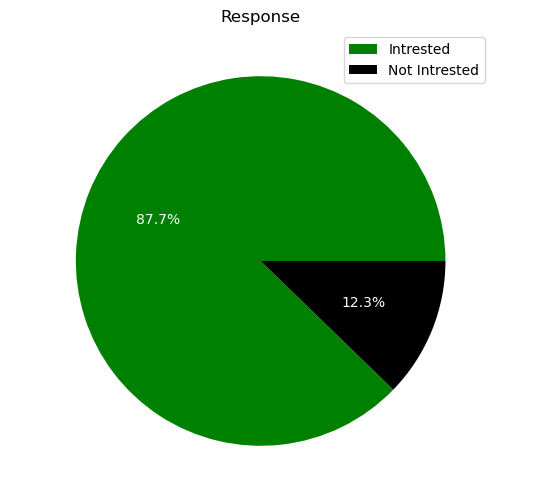

In [52]:
data = df_train['Response'].value_counts()
label = ['Intrested' ,'Not Intrested']
plt.figure( figsize = ( 7,6) )
plt.pie( data, colors= ['g', 'k'] , labels= label ,autopct = '%1.1f%%', textprops= {'color':'white'})
plt.title('Response')
plt.legend()
plt.show()

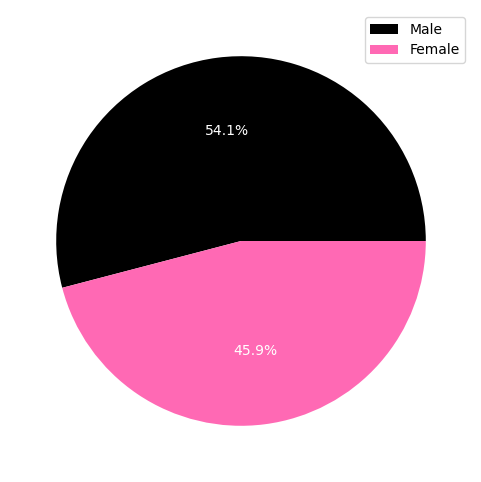

In [53]:
data = df_train['Gender'].value_counts()
label = ['Male' ,'Female']
plt.figure( figsize = ( 7,6 ) )
plt.pie( data, colors= ['k', 'hotpink'] , labels= label ,autopct = '%1.1f%%', textprops= {'color':'white'} )
plt.legend()
plt.show()

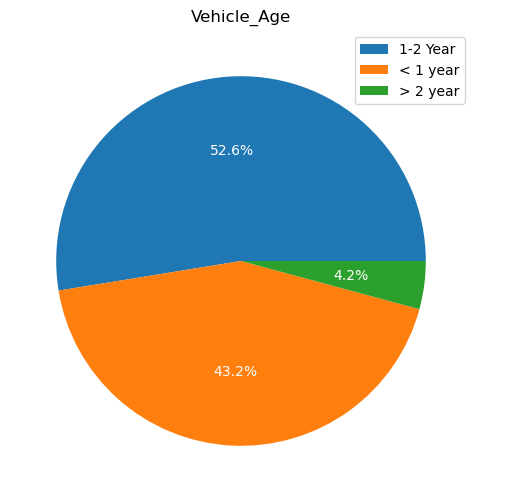

In [54]:
data = df_train['Vehicle_Age'].value_counts()
label = ['1-2 Year' ,'< 1 year', '> 2 year']
plt.figure( figsize = ( 7,6 ) )
plt.pie( data,  labels= label ,autopct = '%1.1f%%', textprops= {'color':'white'} )
plt.title('Vehicle_Age')
plt.legend()
plt.show()

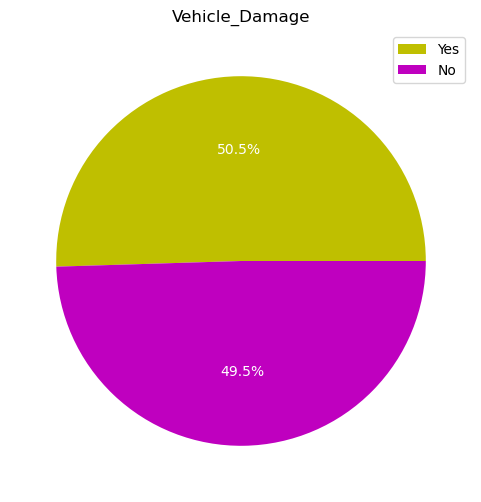

In [55]:
data = df_train['Vehicle_Damage'].value_counts()
label = ['Yes' ,'No']
plt.figure( figsize = ( 7,6 ) )
plt.pie( data,  labels= label , colors=['y', 'm'],autopct = '%1.1f%%', textprops= {'color':'white'} )
plt.title('Vehicle_Damage')
plt.legend()
plt.show()

### Numerical Plots

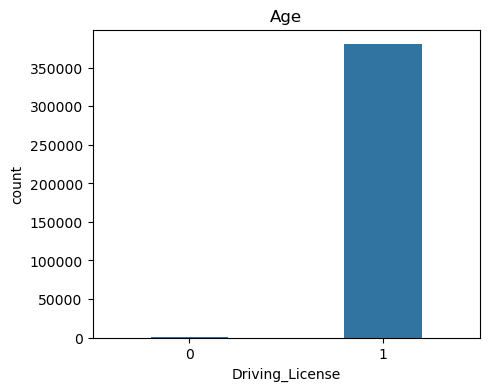

In [57]:
data = df_train['Driving_License'].value_counts()
plt.figure( figsize = (5,4) )
sns.barplot(data , width=0.4)
plt.title('Age')
plt.show()

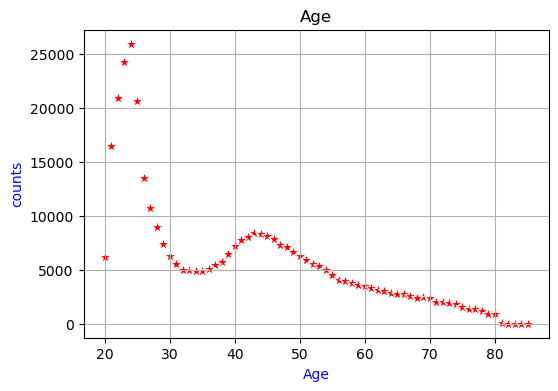

In [58]:
data = df_train['Age'].value_counts()
plt.figure( figsize = ( 6,4 ) )
sns.scatterplot( data , c='red' , marker= '*', s=80)
plt.xlabel('Age' , c='b')
plt.ylabel('counts' , c='b')
plt.title('Age')
plt.grid(True)
plt.show()

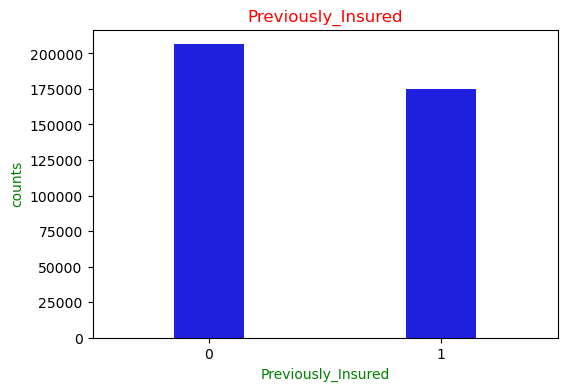

In [59]:
data = df_train['Previously_Insured'].value_counts()
plt.figure( figsize = ( 6,4 ) )
sns.barplot( data ,color='b', width=0.3)
plt.xlabel('Previously_Insured' , c='g')
plt.ylabel('counts' , c='g')
plt.title('Previously_Insured', c='r')
plt.show()

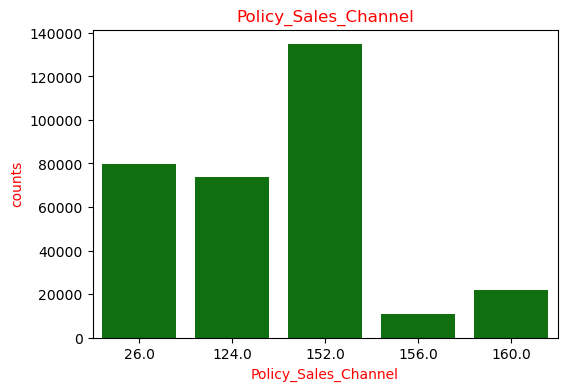

In [60]:
data = pd.DataFrame(df_train['Policy_Sales_Channel'].value_counts().reset_index().head(5))
plt.figure( figsize = ( 6,4 ) )
sns.barplot( x=data['Policy_Sales_Channel'], y=data['count'] , color='g')
plt.xlabel('Policy_Sales_Channel' , c='r')
plt.ylabel('counts' , c='r')
plt.title('Policy_Sales_Channel', c='r')
plt.show()

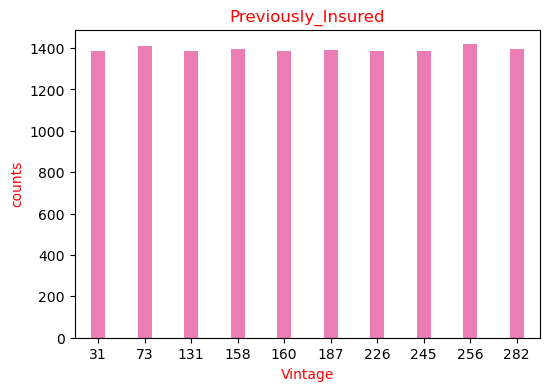

In [61]:
data = pd.DataFrame(df_train['Vintage'].value_counts().reset_index().head(10))
plt.figure( figsize = ( 6,4 ) )
sns.barplot( x=data['Vintage'], y=data['count'] , color='hotpink' ,width=0.3 )
plt.xlabel('Vintage' , c='r')
plt.ylabel('counts' , c='r')
plt.title('Previously_Insured', c='r')
plt.show()

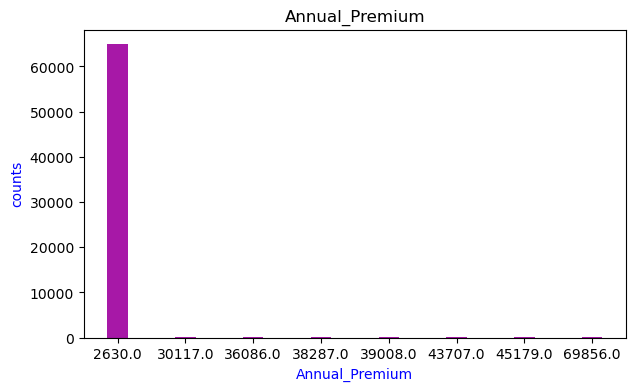

In [62]:
data = pd.DataFrame(df_train['Annual_Premium'].value_counts().reset_index().head(8))
plt.figure( figsize = ( 7,4 ) )
sns.barplot( x=data['Annual_Premium'], y=data['count'] , color='m' ,width=0.3 )
plt.xlabel('Annual_Premium' , c='b')
plt.ylabel('counts' , c='b')
plt.title('Annual_Premium')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
df_train.groupby(['Vehicle_Age'])['Response'].value_counts().plot(kind='bar',color='orange')
plt.xticks(rotation=40)
plt.show()

In [64]:
# Mixed plot

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot( data = df_train, x='Gender' , y='Policy_Sales_Channel' , hue='Response', marker='o')
plt.xlabel('Gender' ,color='red')
plt.ylabel('Policy_Sales_Channel' ,color='red')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot( data=df_train,  x='Driving_License', y ='Age' , hue= 'Response' )
plt.xlabel('Driving_License' , c='g')
plt.ylabel('Age' , c='g')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot( data = df_train ,x ='Vehicle_Age' , y='Region_Code' , hue='Response' )
plt.xlabel('Vehicle_Age' ,color='g')
plt.ylabel('Region_Code' ,color='g')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize= (8,5))
sns.histplot( data= df_train ,x='Gender' , y='Policy_Sales_Channel' , hue='Response', palette='Set2')
plt.xlabel('Gender' ,color='b')
plt.ylabel('Policy_Sales_Channel' ,color='b')
plt.grid(True)
plt.show()

In [ ]:
sns.histplot(x=df_train['Gender'] ,y=df_train['Vehicle_Age'] ,kde=True ,palette='Set3',color='red')
plt.xlabel('Gender', c='m')
plt.ylabel('Vehicle_Age', c='m')
plt.show()

In [ ]:
sns.pairplot(df_train.select_dtypes(exclude=object) ,diag_kind= 'hist', corner=True)
plt.show()

## CORRELATION TESTING

### Outlier Detection by Variance Inflation Factor ( VIF )

In [73]:
outlier = add_constant(df_train.select_dtypes(exclude=object))

In [74]:
df = pd.DataFrame()

In [75]:
df['features'] = outlier.columns

In [76]:
df['VIF'] = [ variance_inflation_factor( outlier.values,i) for i in range(outlier.shape[1] ) ]

In [77]:
# VIF = 1 no correlation with other variables
# VIF = < 1 VIF < 5 = Moderated Acceptable
# VIF > 5 or 10 = High correlation

df

,features,VIF
0,const,531.246889
1,Gender,1.029511
2,Age,2.694368
3,Driving_License,1.008209
4,Region_Code,1.002924
5,Previously_Insured,3.177192
6,Vehicle_Age,2.838592
7,Vehicle_Damage,3.249448
8,Annual_Premium,1.015714
9,Policy_Sales_Channel,1.588222


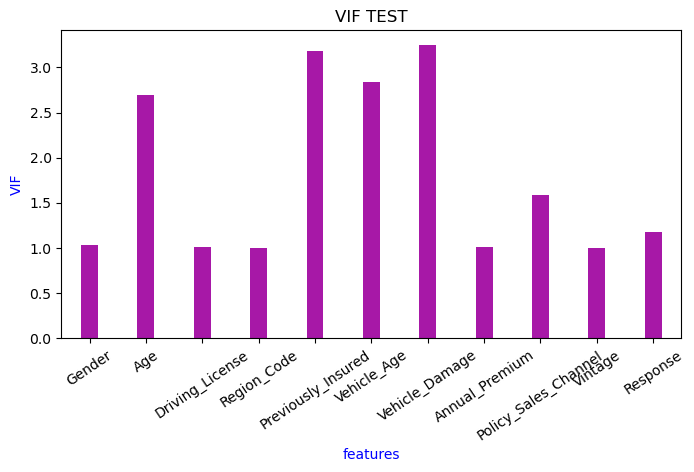

In [78]:
# outlier detection

plt.figure( figsize = ( 8,4 ) )
sns.barplot( x=df['features'].loc[1:], y=df['VIF'] , color='m' ,width=0.3 )
plt.xlabel('features' , c='b')
plt.ylabel('VIF' , c='b')
plt.title('VIF TEST')
plt.xticks(rotation = 34)
plt.show()

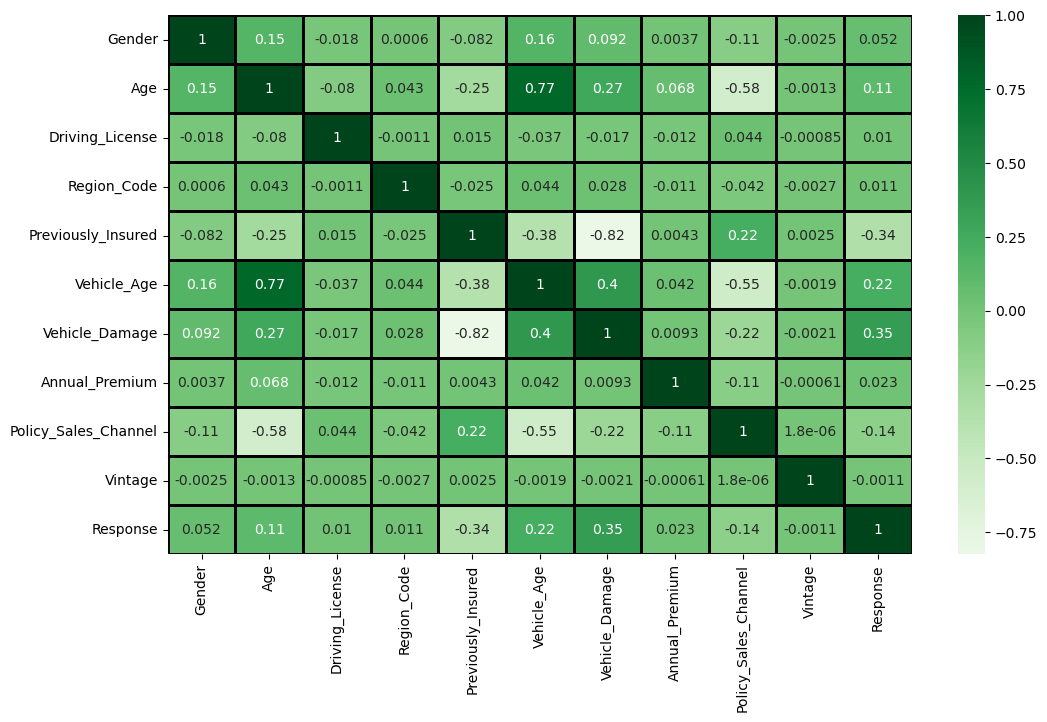

In [79]:
plt.figure(figsize=(12,7))
sns.heatmap(df_train.select_dtypes(exclude=object).corr() , annot=True , linewidths=1 , cmap='Greens',linecolor="black", center=0 )
plt.show()

## Split Into X & Y

In [80]:
X = df_train.drop( columns=['Response'], axis=1 )  # Independent variables
y = df_train['Response']  # Dependent variable

In [81]:
X[:2]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,1,0,33536.0,26.0,183


## Feature Scaling 

In [83]:
scale = MinMaxScaler()

In [84]:
X = scale.fit_transform( X )

## Data Spliting

In [86]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.25 , random_state=42 )

In [87]:
 X_train.shape , X_test.shape , y_train.shape , y_test.shape

((285831, 10), (95278, 10), (285831,), (95278,))

In [88]:
y_train.value_counts()

Response
0    250886
1     34945
Name: count, dtype: int64

In [89]:
# import sampling method for get Balanced data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [90]:
# UnderSampling

under_sampling = RandomUnderSampler( sampling_strategy='auto' , random_state=42 )

In [91]:
X_train_underSample, y_train_underSample = under_sampling.fit_resample( X_train, y_train )

In [92]:
X_train_underSample.shape, y_train_underSample.shape

((69890, 10), (69890,))

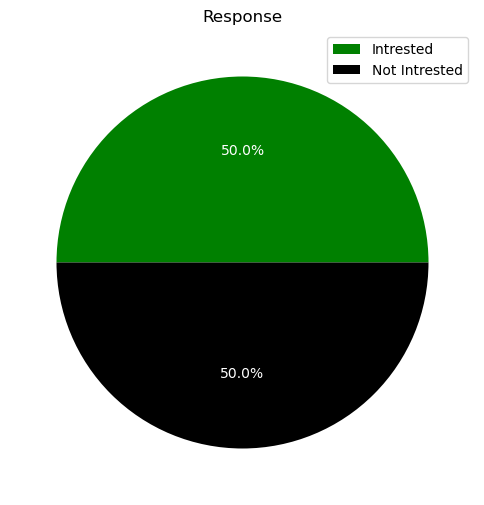

In [93]:
# now data is Balanced

data = y_train_underSample.value_counts()
label = ['Intrested' ,'Not Intrested']
plt.figure( figsize = ( 6,7) )
plt.pie( data, colors= ['g', 'k'] , labels= label ,autopct = '%1.1f%%', textprops= {'color':'white'})
plt.title('Response')
plt.legend()
plt.show()

# MODEL IMPLEMENT

## LOGISTIC REGRESSION

In [96]:
# import Logistic Regression 

from sklearn.linear_model import LogisticRegression

In [97]:
lr = LogisticRegression( penalty='l2', solver='liblinear', C=0.1 )    # Model assigning with some parameters

In [98]:
lr.fit( X_train_underSample, y_train_underSample )    # Fitting the Model

LogisticRegression(C=0.1, solver='liblinear')

In [99]:
# Created function for Outputs

def prediction( X_train, test_x, y_train, test_y, model ):
    
    train_pred = model.predict( X_train )
    test_pred = model.predict( X_test )
    
    print(f'\nAccuracy : { accuracy_score( y_train , train_pred )}')
    print(f'\nconfusion_matrix :\n { confusion_matrix ( y_train , train_pred )}\n')
    print(f'\nclassification_report : \n{ classification_report ( y_train , train_pred )}')
    
    print('\n','=====================================================','\n')
    
    print(f'Accuracy : { accuracy_score( y_test , test_pred )}')
    print(f'\nconfusion_matrix :\n { confusion_matrix ( y_test , test_pred )}\n')
    print(f'/nclassification_report : \n{ classification_report ( y_test , test_pred )}')


In [100]:
# LOGISTIC REGRESSION OUTPUT

prediction( X_train_underSample, X_test, y_train_underSample, y_test, lr )


Accuracy : 0.8776269893748404

confusion_matrix :
 [[250813     73]
 [ 34905     40]]


classification_report : 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    250886
           1       0.35      0.00      0.00     34945

    accuracy                           0.88    285831
   macro avg       0.62      0.50      0.47    285831
weighted avg       0.81      0.88      0.82    285831



Accuracy : 0.8764877516320662

confusion_matrix :
 [[83494    19]
 [11749    16]]

/nclassification_report : 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83513
           1       0.46      0.00      0.00     11765

    accuracy                           0.88     95278
   macro avg       0.67      0.50      0.47     95278
weighted avg       0.82      0.88      0.82     95278



## K NEAREST NEIGHBORS ( KNN )

In [102]:
# import KNEARESTNEIGHBORS (KNN)

from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn = KNeighborsClassifier( n_neighbors= 3 , metric='manhattan' ,n_jobs= -1 )    # Model Assigning with some parameters

In [104]:
knn.fit( X_train_underSample, y_train_underSample )    # Fitting the Model

In [105]:
# KNEARESTNEIGHBORS (KNN) OUTPUT

prediction( X_train_underSample, X_test, y_train_underSample, y_test, knn )

## NAIVE BAYES

In [107]:
# Import Naive Bayes 

from sklearn.naive_bayes import GaussianNB

In [108]:
nb = GaussianNB()  # Model assign

In [109]:
nb.fit( X_train_underSample, y_train_underSample )  # Fit the Model

In [110]:
# NAIVE BAYES Output

prediction( X_train_underSample, X_test, y_train_underSample, y_test, nb )

## DECISION TREE

In [112]:
# Import DECISION TREE
# Import SearchCV for CrossValidation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

In [113]:
# Model Assign

dt = DecisionTreeClassifier()

In [ ]:
# Decision Tree Output

prediction( X_train_underSample, X_test, y_train_underSample, y_test, dt )

In [114]:
# Set Multiple Parameters for getting best parameters

param = {
     'criterion' : [ 'gini' , 'entropy' ],
     'max_depth' : [ None , 28 , 21, 35 ],
     'min_samples_split' : range( 6, 25 ),
     'min_samples_leaf' : [1 ,3 , 4 ,5],
    'max_features' : [ 'auto', 'sqrt', 'log2' ]
}

In [115]:
# use GridSearchCV for Crossvalidation

grid = GridSearchCV ( estimator=dt ,param_grid=param ,scoring='accuracy', n_jobs=-1 , verbose=2 )

In [116]:
grid.fit( X_train_underSample ,y_train_underSample )  # Fit the Model

In [117]:
# Decision Tree Output

prediction( X_train_underSample, X_test, y_train_underSample, y_test, grid )

## RANDOM FOREST

In [119]:
# Import RANDOM FOREST 

from sklearn.ensemble import RandomForestClassifier

In [120]:
rf = RandomForestClassifier(n_estimators=21,class_weight='balanced', random_state=42)   # Model Assign

In [360]:
rf.fit( X_train_underSample ,y_train_underSample )   # Fit The Model

RandomForestClassifier(class_weight='balanced', n_estimators=21,
                       random_state=42)

In [361]:
# RANDOM FOREST Output

prediction( X_train_underSample, X_test, y_train_underSample ,y_test, rf )


Accuracy : 0.9961654027757906

confusion_matrix :
 [[34716   229]
 [   39 34906]]


classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     34945
           1       0.99      1.00      1.00     34945

    accuracy                           1.00     69890
   macro avg       1.00      1.00      1.00     69890
weighted avg       1.00      1.00      1.00     69890



Accuracy : 0.714582589894834

confusion_matrix :
 [[57851 25662]
 [ 1532 10233]]

/nclassification_report : 
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     83513
           1       0.29      0.87      0.43     11765

    accuracy                           0.71     95278
   macro avg       0.63      0.78      0.62     95278
weighted avg       0.89      0.71      0.76     95278



In [123]:
# Set Multiple Parameters for getting best parameters

param_grid = {
    'n_estimators': [ 20,27 ], 
    'max_features': [ 0.3, 0.5 ],
    'max_depth': [ 11,9 ],  
    'min_samples_split': [ 10,25 ],
    'min_samples_leaf': [ 7, 11 ],
    'bootstrap': [ True, False ]
}

In [124]:
# GridSearchCV for CrossValidation

rf_grid = GridSearchCV( estimator= rf , param_grid= param_grid , cv= 5 , n_jobs= -1 ,verbose= 1 , scoring='neg_mean_squared_error' ) 

In [125]:
rf_grid.fit( X_train_underSample ,y_train_underSample )    # Fit The Model

In [126]:
rf_grid.best_params_

In [127]:
# RANDOM FOREST Output

prediction( X_train_underSample, X_test, y_train_underSample, y_test, nb )

## BOOSTING

#### ADABOOSTING

In [130]:
# Import AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

In [131]:
boost = AdaBoostClassifier( n_estimators=45 )     # Model Assign with parameters

In [132]:
boost.fit( X_train_underSample, y_train_underSample )

In [133]:
# AdaBoostClassifier Output

prediction( X_train_underSample, X_test, y_train_underSample, y_test, boost )

#### xgboost

In [135]:
import xgboost as xgb

In [136]:
xgb_clf = xgb.XGBClassifier()

In [137]:
xgb_clf.fit( X_train_underSample , y_train_underSample )

In [138]:
# xgboost Output

prediction( X_train_underSample, X_test, y_train_underSample, y_test, xgb_clf )

## VOTING

In [140]:
# Import VotingClassifier

from sklearn.ensemble import VotingClassifier

In [141]:
# Set Parameters 

estimators = [('rf1', RandomForestClassifier( max_depth = 5, max_features = 0.3, min_samples_leaf= 5, min_samples_split=5 )),
('rf2', RandomForestClassifier()),
('xgb', xgb.XGBClassifier()),
('ada', AdaBoostClassifier())]

voting = VotingClassifier( estimators= estimators, voting = 'soft' )

In [142]:
voting.fit( X_train_underSample, y_train_underSample )   # Fit the Model

In [143]:
# Voting Output

prediction( X_train_underSample, X_test, y_train_underSample, y_test, voting )

## STACKING 

In [145]:
# Import StackingClassifier

from sklearn.ensemble import StackingClassifier

In [146]:
# Set Base Models 

estimators = [('rf1', RandomForestClassifier( max_depth = 7, max_features = 0.3, min_samples_leaf= 5, min_samples_split= 5 )),
('rf2', RandomForestClassifier()),
('xgb', xgb.XGBClassifier()),
('ada', AdaBoostClassifier())]

stacking = StackingClassifier( estimators=estimators, final_estimator= LogisticRegression() )  # Model Assign with Meta Model

In [147]:
stacking.fit( X_train_underSample , y_train_underSample )   # Fit the Model

In [148]:
# Stacking Output

prediction( X_train_underSample, X_test, y_train_underSample, y_test, stacking )

### Create the Joblib File

In [298]:
import joblib
import pickle

In [386]:
joblib.dump(rf,'hack_1.pkl')

['hack_1.pkl']